In [38]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import Common_Functions as cmn

# Figuring out which Regressions to apply to our Datasets using a MSE Test on our Training Data

Following Notebooks 1.0 and 1.1, we decided to continue the evaluation without the columns that include strings, like, for example, MSZoning or Street, as the label encoder didn't give significantly different results in our model compared to when not taking them into account. We therefore exported the "new" trianing and test data, without strings into new CSVs called stringless_train.csv and stringless_test.csv to be read by the function in the common_functions.py file for further use. This way, we eliminate the need to reread the original csvs and remove all NaN values and string values.

### Hypothesis 2
We predict that the two best regressors will be the random forest and the machine learning model MLPRegressor, as random forest was the first regressor that we came in contact with and is very good with large datasets while MLP, a neural processing network, can best accurately predict housing prices.

In [39]:
training_data = cmn.get_stringless_training_data()
testing_data = cmn.get_stringless_testing_data()
display(training_data.head(), testing_data.head())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


Since the training data has one additional column, containing the sale price of the house with its given parameters, we split the dataframe into the X_train and y_train dataframes to continue with the calculations.

In [40]:
X_train = training_data.iloc[:, :-1]
y_train = training_data.iloc[:, -1:]
display(X_train.shape, X_train.head(), y_train.shape, y_train.head())

(1460, 37)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


(1460, 1)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [41]:
X_test = testing_data
y_test = [] # y_test does not exist in the testing data like above, so we are creating an empty list as a placeholder.
display(X_test.shape, X_test.head(), y_test)

(1459, 37)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


[]

# Scoring various Regression Models to verify which we will be using going forward

In [42]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train)
y = np.log1p(y_train)
cross_validation = 10
scores_map = {}

##### Random Forest Regressor

In [43]:
forest = RandomForestRegressor()

scores = cross_val_score(forest, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['RF'] = scores

MSE: -0.02140016267612616 (+/- 0.00522436620237739)


##### Gradient Boosting Regressor

In [44]:
#gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, random_state=1)
gbr = GradientBoostingRegressor()

scores = cross_val_score(gbr, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['GBR'] = scores

MSE: -0.017997810154705522 (+/- 0.005130987458928686)


##### Decision Tree Regressor

In [45]:
decision_tree = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(decision_tree, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['Decision Tree'] = scores

MSE: -0.03863091382955428 (+/- 0.004581065390720994)


##### Support Vector Regression

In [46]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)

scores = cross_val_score(svr, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['SVR'] = scores

MSE: -0.03166244241036211 (+/- 0.010157580971544644)


##### K Nearest Neighbors Regressor

In [47]:
knn = KNeighborsRegressor(n_neighbors=7)

scores = cross_val_score(knn, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['K Nearest Neighbors'] = scores

MSE: -0.0361498432991211 (+/- 0.004224164367702694)


##### Linear Regression

In [48]:
linear_regression = LinearRegression()

scores = cross_val_score(linear_regression, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['Linear'] = scores

MSE: -0.025721566544727497 (+/- 0.01417138600624562)


##### XGBoost Regression

In [49]:
xgboost = XGBRegressor(n_estimators=1000)

scores = cross_val_score(xgboost, x_scaled, np.ravel(y), cv=cross_validation, scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['XGB'] = scores

MSE: -0.02169366366726016 (+/- 0.004441817901286601)


##### Multilayer Perceptron Regressor

In [50]:
mlp_regression = MLPRegressor(max_iter=10000)

scores = cross_val_score(estimator=mlp_regression,
                         X=x_scaled,
                         y=np.ravel(y.astype(float)),
                         cv=cross_validation,
                         scoring='neg_mean_squared_error')
print(f"MSE: {scores.mean()} (+/- {scores.std()})")

scores_map['MLP'] = scores

MSE: -0.03710699845488031 (+/- 0.02721371976667996)


In [51]:
# from sklearn.neural_network import MLPClassifier
#
# clf = MLPClassifier(max_iter=10000)
# #print(np.ravel(y))
# #clf.fit(x_scaled, np.ravel(y_train))
# scores = cross_val_score(clf, x_scaled, np.ravel(y.astype(float)), cv=cross_validation, scoring='neg_mean_squared_error')
# print(f"MSE: {scores.mean()} (+/- {scores.std()})")
#
# scores_map['MLPClassifier'] = scores

Text(0, 0.5, 'Regression Error')

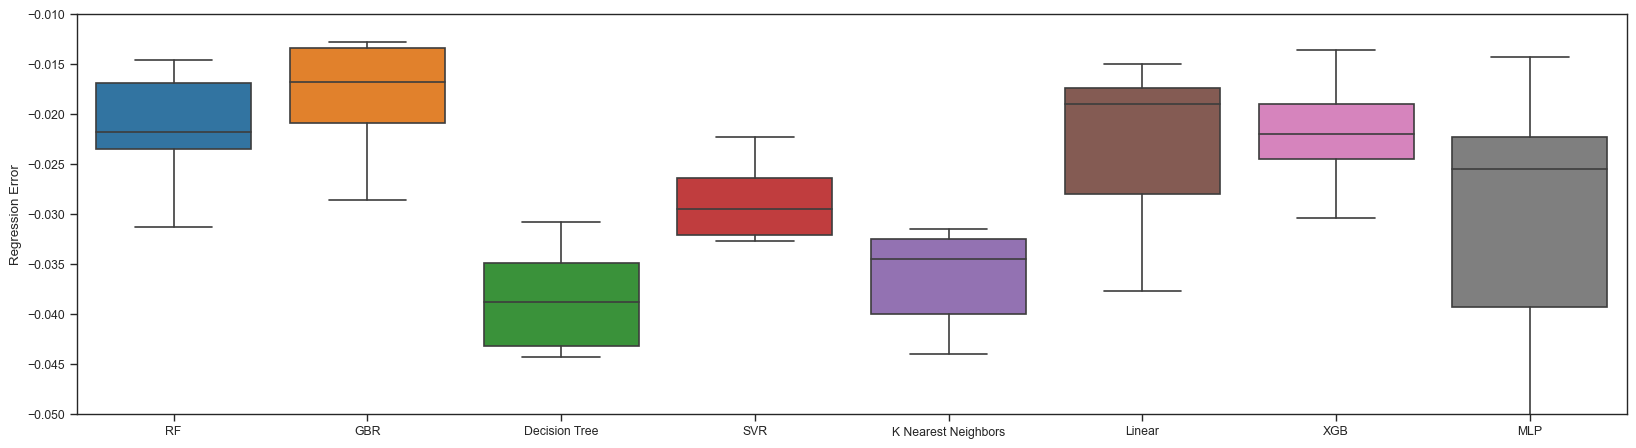

In [52]:
sns.set_context("paper")
sns.set_style("ticks")
plt.figure(figsize=(20, 5.2))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)
plt.ylim(-.05, -.01)
plt.ylabel(r"Regression Error")
#plt.title("Mean-Squared Error of all Regressions")

Text(0, 0.5, 'Regression Error')

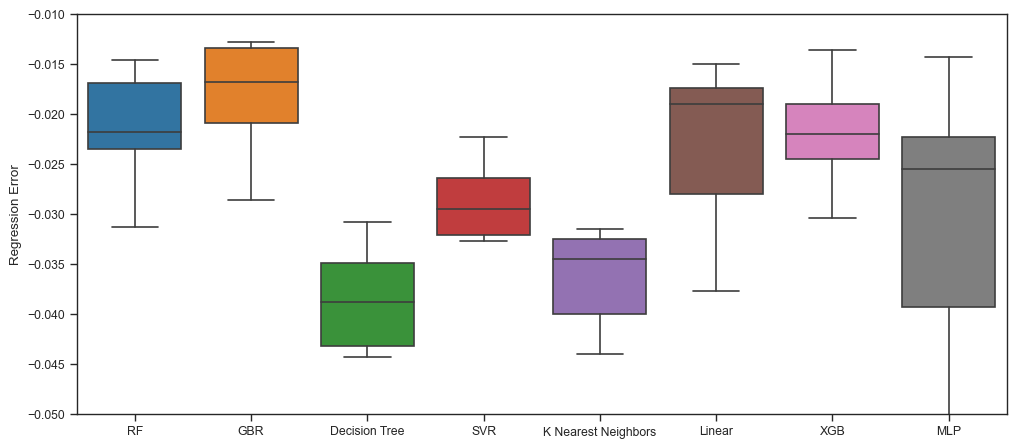

In [53]:
sns.set_context("paper")
sns.set_style("ticks")
plt.figure(figsize=(12, 5.2))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)
plt.ylim(-.05, -.01)
plt.ylabel(r"Regression Error")
#plt.title("Mean-Squared Error of all Regressions")

As we can see above our hypthesis was not correct. In fact, the machine learning model MLP Regressor didnt even make it in the top half of all our models, and we will therefore not continue with that model going forward.

Instead, Gradient boosting regressor was the best for this dataset, closely followed by the random forest, the linear model, and finally XGB.

In [54]:
scores_map

,RF,GBR,Decision Tree,SVR,K Nearest Neighbors,Linear,XGB,MLP
0,-0.023681,-0.019164,-0.040194,-0.031443,-0.037402,-0.019818,-0.019069,-0.025755
1,-0.016632,-0.012786,-0.033934,-0.029371,-0.035171,-0.014980,-0.013605,-0.019002
2,-0.017837,-0.013494,-0.035394,-0.029570,-0.033058,-0.017271,-0.018977,-0.061383
3,-0.031281,-0.028637,-0.044347,-0.060597,-0.040808,-0.037681,-0.030366,-0.042892
4,-0.027934,-0.024241,-0.043785,-0.032759,-0.033858,-0.024097,-0.024931,-0.028578
5,-0.014635,-0.013382,-0.030798,-0.022342,-0.031514,-0.017699,-0.017616,-0.025227
6,-0.020530,-0.018062,-0.042331,-0.027007,-0.041251,-0.018239,-0.025274,-0.022759
7,-0.015138,-0.013238,-0.037373,-0.024995,-0.032368,-0.015043,-0.021659,-0.014374
8,-0.023156,-0.015498,-0.034682,-0.032373,-0.043970,-0.063051,-0.023151,-0.108978
9,-0.023178,-0.021475,-0.043470,-0.026168,-0.032098,-0.029337,-0.022288,-0.022124
